# Configurações e treinamento da rede neural

In [5]:
#importando módulos e bibliotecas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sagemaker
from sagemaker import get_execution_role

In [6]:
bucket = 'sagemaker-studio-500257255576-rng89jjkob' #definindo o bucket que será utilizado
subpasta_dataset = 'mnist' #subpasta onde será armazenado o dataset
session = sagemaker.Session() #sessão - região
role = get_execution_role() #permissões de execução
region = session.boto_session.region_name #pegando a região de onde estamos executando
base_treinamento = 's3://sagemaker-sample-data-{}/tensorflow/mnist'.format(region) #carregando a base de treinamento
output_location = 's3://{}/{}/output-tf'.format(bucket, subpasta_dataset) #pasta onde será armazenado o modelo treinado

#imprimindo na tela o caminho dos diretórios definidos acima
print('Localização da base de treinamento: ', base_treinamento)
print('Região: ', region)
print('Localização do modelo: ', output_location)

Localização da base de treinamento:  s3://sagemaker-sample-data-us-east-1/tensorflow/mnist
Região:  us-east-1
Localização do modelo:  s3://sagemaker-studio-500257255576-rng89jjkob/mnist/output-tf


In [7]:
#configuração do estimator
from sagemaker.tensorflow import TensorFlow
mnist_tensorflow = TensorFlow(
    entry_point = "mnist.py",
    role = role,
    instance_count = 1,
    instance_type = 'ml.p2.xlarge',
    framework_version = '2.5',
    py_version = 'py37',
    output_path = output_location,
    hyperparameter = {
        'epochs': 10,
        'batch_size': 128, 
        'learning-rate': 0.01,
        'dropout': 1
    }
)

In [8]:
#treinando o modelo
mnist_tensorflow.fit(base_treinamento)

2023-04-17 00:54:39 Starting - Starting the training job...
2023-04-17 00:55:05 Starting - Preparing the instances for trainingProfilerReport-1681692879: InProgress
......
2023-04-17 00:56:03 Downloading - Downloading input data...
2023-04-17 00:56:33 Training - Downloading the training image..................
2023-04-17 00:59:35 Training - Training image download completed. Training in progress....2023-04-17 01:00:00.231531: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2023-04-17 01:00:00.231794: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future recorded events will be dropped.
2023-04-17 01:00:00.237536: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-17 01:00:00.285736: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the

In [9]:
!pygmentize mnist.py

#criando a ligação entre o tensorflow e sagemaker

import argparse
import json
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

if __name__ == "__main__":
    
    #trabalhar com linhas de comando para chamadas externas no py
    parser = argparse.ArgumentParser()
    
    #parametros relacionados à rene neural
    parser.add_argument('--epochs', type=int, default=2) #epocas de treino
    parser.add_argument('--learning-rate', type=float, default=0.001) #taxa de aprendizagem
    parser.add_argument('--batch-size', type=int, default=32) #batchsize
    parser.add_argument('--dropout', type=int) #
    
    #variaveis de ambiente
    parser.add_argument('--train', type=str, default=os.environ.get('SM_CHANNEL_TRAINING'))
    parser.add_argument('--model-dir', type=str)
    parser.add_argument('--sm-model-dir', type=str, default=os.environ.get('S

# Deploy e previsões

In [10]:
#definindo o classificador
classificador_mnist = mnist_tensorflow.deploy(initial_instance_count = 1,
                                              instance_type = 'ml.p2.xlarge')

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


--------------!

In [11]:
#importando os dadosq ue iremos utilizar
!aws --region {region} s3 cp s3://sagemaker-sample-data-{region}/tensorflow/mnist/eval_data.npy eval_data.npy
!aws --region {region} s3 cp s3://sagemaker-sample-data-{region}/tensorflow/mnist/eval_labels.npy eval_labels.npy

download: s3://sagemaker-sample-data-us-east-1/tensorflow/mnist/eval_data.npy to ./eval_data.npy
download: s3://sagemaker-sample-data-us-east-1/tensorflow/mnist/eval_labels.npy to ./eval_labels.npy


In [12]:
#carregando os dados nas variáveis
X_test = np.load('eval_data.npy')
y_test = np.load('eval_labels.npy')

In [13]:
#observando o formado dos dados
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [14]:
#observando o tipo dos dados
type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [15]:
#selecionando um elemento  parfa ver seu formato
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
#escolhendo uma imagem para fazer o teste
y_test[7]

9

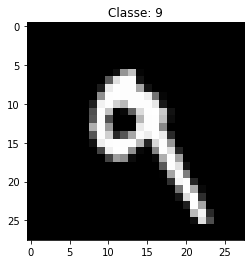

In [17]:
#plotando um gráfico para vermos qual imagem foi selecionada
plt.imshow(X_test[7].reshape(28,28), cmap='gray')
plt.title('Classe: ' + str(y_test[7]));

In [18]:
#fazendo a previsão e imprimindo os resultados
previsao = classificador_mnist.predict(X_test[7])
previsao

{'predictions': [[2.86988252e-05,
   6.67505738e-05,
   0.000655184034,
   0.0314125642,
   0.00300158537,
   0.025215501,
   2.14833193e-07,
   0.00899021607,
   0.00057343248,
   0.930055857]]}

In [19]:
previsao = previsao['predictions']
previsao

[[2.86988252e-05,
  6.67505738e-05,
  0.000655184034,
  0.0314125642,
  0.00300158537,
  0.025215501,
  2.14833193e-07,
  0.00899021607,
  0.00057343248,
  0.930055857]]

In [20]:
#observando qual número a previsão selecionou como sendo o número apresentado na imagem
np.argmax(previsao)

9